In [1]:
#from sklearn.datasets import load_iris

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import model_selection

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier as dtc # 树算法
from sklearn.model_selection import train_test_split # 拆分数据
from sklearn.metrics import accuracy_score, roc_curve, auc #模型准确度
from sklearn.tree import plot_tree # 树图
from sklearn import neural_network
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
#读取txt文件
f = open("TeleComm_User_Info.txt",encoding = 'gb2312')
df= pd.read_csv(f) #会默认第一行是name
print(df.shape)
df.to_csv('TeleComm_User_Info.csv',encoding = 'gb2312')
df=df.loc[(df['客户类型']=='公众客户')]
print(len(df))
df=df.loc[(df['性别']!='无法区分')]
print(len(df))
df=df.loc[(df['渠道类型描述']!='其他渠道')]
print(len(df))
df=df.loc[(df['终端类型']!='0')]
#print('drop终端类型',len(df))
df.isna().sum()
df=df.dropna()
print(len(df))
dfori=df
df.to_csv('TeleComm_2.csv',encoding = 'gb2312')

(8999, 23)
8846
8780
8731
7687


In [3]:
df= pd.read_csv('TeleComm_2.csv',encoding = 'gb2312')
df=df.drop(['Unnamed: 0','客户类型','入网渠道类型'], axis=1)
print(df.columns)
df.iloc[:,1:].head(2)

Index(['用户ID', '性别', '年龄', '归属地', '在网时长', '换机频率', '终端品牌', '终端类型', '最近使用操作系统偏好',
       '渠道类型描述', '上网流量使用', '漫游流量使用', '总收入', '增值收入', '流量收入', '短信收入', '彩信收入',
       '语音收入', '是否欠费', '产品大类', '产品分类'],
      dtype='object')


,性别,年龄,归属地,在网时长,换机频率,终端品牌,终端类型,最近使用操作系统偏好,渠道类型描述,上网流量使用,漫游流量使用,总收入,增值收入,流量收入,短信收入,彩信收入,语音收入,是否欠费,产品大类,产品分类
0,女,20.0,石家庄,15,频繁换机型,LG,4G,ANDROID 5.1.0,社会渠道,568.399661,0.000000,76.25,45.90,35.7,1.20,1.2,4.35,否,本地套餐,4G本地套餐-26元套餐
1,女,63.0,北京,70,频繁换机型,苹果,3G,IOS 6.0,社会渠道,106.718701,6.202381,73.77,1.56,15.0,1.56,0.0,0.96,否,智慧沃家共享,智慧沃家共享套餐-全国流量包49.9元1GB


In [4]:
trial = df.copy()
gender_mapping = {label:idx for idx, label in enumerate(np.unique(trial.性别))}
trial.性别 = trial.性别.map(gender_mapping)
print('性别',gender_mapping)

location_mapping = {label:idx for idx, label in enumerate(np.unique(trial.归属地))}
trial.归属地 = trial.归属地.map(location_mapping)
print('归属地',location_mapping)

frequency_mapping = {label:idx for idx, label in enumerate(np.unique(trial.换机频率))}
trial.换机频率 = trial.换机频率.map(frequency_mapping)
print('换机频率',frequency_mapping)

terminal_mapping = {label:idx for idx, label in enumerate(np.unique(trial.终端类型))}
trial.终端类型 = trial.终端类型.map(terminal_mapping)
print('终端类型',terminal_mapping)

owe_mapping = {label:idx for idx, label in enumerate(np.unique(trial.是否欠费))}
trial.是否欠费 = trial.是否欠费.map(owe_mapping)
print('是否欠费',owe_mapping)

product_mapping = {label:idx for idx, label in enumerate(np.unique(trial.产品大类))}
trial.产品大类 = trial.产品大类.map(product_mapping)
print('产品大类',product_mapping)

product_mapping = {label:idx for idx, label in enumerate(np.unique(trial.最近使用操作系统偏好))}
trial.最近使用操作系统偏好 = trial.最近使用操作系统偏好.map(product_mapping)
#print('最近使用操作系统偏好',product_mapping)

性别 {'女': 0, '男': 1}
归属地 {'保定': 0, '北京': 1, '唐山': 2, '天津': 3, '廊坊': 4, '张家口': 5, '承德': 6, '沧州': 7, '石家庄': 8, '秦皇岛': 9, '衡水': 10, '邢台': 11, '邯郸': 12}
换机频率 {'从不换机型': 0, '偶尔换机型': 1, '频繁换机型': 2}
终端类型 {'2G': 0, '3G': 1, '4G': 2}
是否欠费 {'否': 0, '是': 1}
产品大类 {'4G全国语音套餐': 0, '4G本地行业套餐': 1, '4G本地语音套餐': 2, '4G本地迁转套餐': 3, '共享自由组合': 4, '国内流量套餐': 5, '基本套餐': 6, '智慧沃家共享': 7, '本地套餐': 8, '校园专属-小区A套餐': 9, '校园专属-小区基本套餐': 10, '校园专属-沃派': 11, '校园专属-非小区A套餐': 12, '校园专属-非小区B套餐': 13, '校园专属-非小区基本套餐': 14, '省内流量套餐': 15}


In [5]:
trial2 = trial.drop(['终端品牌','产品分类','渠道类型描述'], axis=1)
trial2['channel']=trial['渠道类型描述']
trial2['is_train'] = np.random.uniform(0, 1, len(df)) <= .7
#trial2.head()
features = trial2.columns[1:-2]
data = trial2[features].values
target,_= pd.factorize(trial2['channel'])
train, test = trial2[trial2['is_train']==True], trial2[trial2['is_train']==False]

In [81]:
trial2.head()

,用户ID,性别,年龄,归属地,在网时长,换机频率,终端类型,最近使用操作系统偏好,上网流量使用,漫游流量使用,总收入,增值收入,流量收入,短信收入,彩信收入,语音收入,是否欠费,产品大类,channel,is_train
0,00891A97FB48EA2B4F552111D97B1870,0,20.0,8,15,2,2,23,568.399661,0.000000,76.25,45.90,35.7,1.20,1.2,4.35,0,8,社会渠道,True
1,00F84124D037DCC637FFE3C6EAAB492E,0,63.0,1,70,2,1,31,106.718701,6.202381,73.77,1.56,15.0,1.56,0.0,0.96,0,7,社会渠道,True
2,0129B973BF31D6B4086C7E38F7BFF43E,1,21.0,1,33,2,2,24,3930.230795,2.016909,164.60,15.00,1.6,15.00,0.0,23.60,1,5,社会渠道,True
3,01EBB91E44F31EF4D70A4B9A5E72D9D3,1,20.0,3,45,2,2,34,2026.990448,1938.247254,227.30,104.84,120.0,3.00,0.0,18.15,0,6,社会渠道,False
4,02771333B92DF691B363A9DDEF7312D7,1,23.0,1,45,2,2,20,5732.901909,1082.158408,144.00,75.00,60.0,15.00,0.0,9.00,0,11,社会渠道,True


In [6]:
#baseline 1: 全部预测为社会渠道
acc=trial2.groupby(['channel'])['用户ID'].count()[0]/len(trial2)
#0.5424743072720177
print('全部预测为社会渠道:acc=',acc)

全部预测为社会渠道:acc= 0.5424743072720177


In [7]:
#baseline 2: 朴素贝叶斯
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

clf = BernoulliNB()
clf = clf.fit(data, target)
y_pred=clf.predict(data)
acc=1-((target != y_pred).sum())/data.shape[0]
print("伯努利朴素贝叶斯:accuracy=",acc)

clf = GaussianNB()
clf = clf.fit(data, target)
y_pred=clf.predict(data)
acc=1-((target != y_pred).sum())/data.shape[0]
print("高斯朴素贝叶斯:accuracy=",acc)

伯努利朴素贝叶斯:accuracy= 0.5838428515675816
高斯朴素贝叶斯:accuracy= 0.6185768180044231


In [8]:
#baseline3:单颗决策树
model = dtc(criterion = 'entropy', max_depth = 4,random_state=100)
y, _ = pd.factorize(train['channel'])
model.fit(train[features].values, y)
 
pred_model = model.predict(test[features].values)
y2, _ = pd.factorize(test['channel'])
print('决策树:accuracy= {:.0%}'.format(accuracy_score(y2, pred_model)))

决策树:accuracy= 67%


# 随机森林

confusion matrix:
 preds      0    1
actual           
0       1009  269
1        436  593
accuracy= 0.694408322496749
precision= 0.7895148669796557
recall= 0.6982698961937717
cross_val_score= 0.6892150533904479
obb= 0.6825278810408922


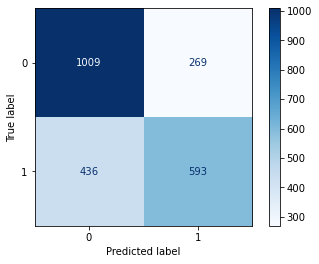

In [9]:
#随机森林
rnd = RandomForestClassifier(n_jobs=-1,random_state=50,oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=50)

rnd.fit(X_train,y_train)
y_pred=rnd.predict(X_test)
a=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])
acc=(a.iloc[0,0]+a.iloc[1,1])/(a.iloc[0,0]+a.iloc[0,1]+a.iloc[1,0]+a.iloc[1,1])
pre=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[0,1])
rec=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[1,0])
print('confusion matrix:\n',a)
print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)
print('cross_val_score=',cross_val_score(rnd, data, target, cv=5).mean())
print('obb=',rnd.oob_score_)
a=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(a).plot(cmap=plt.cm.Blues)

Text(0, 0.5, 'TPR')

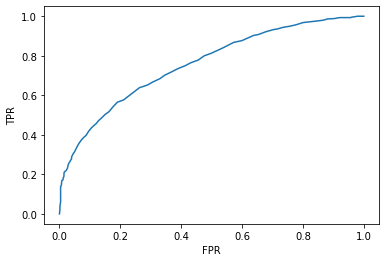

In [13]:
fpr,tpr, thresholds = roc_curve(y_test,rnd.predict_proba(X_test)[:,1])
 
plt.plot(fpr,tpr,label='ROC')
 
plt.xlabel('FPR')
plt.ylabel('TPR')

In [14]:
#调参第一步：n_estimators
cross = []
for i  in range(0,300,10):
    rf = RandomForestClassifier(n_estimators=i+1, n_jobs=-1,random_state=50)
    cross_score = cross_val_score(rf, data, target, cv=5).mean()
    cross.append(cross_score)
print((cross.index(max(cross))*10)+1,max(cross))

271 0.690515612718949


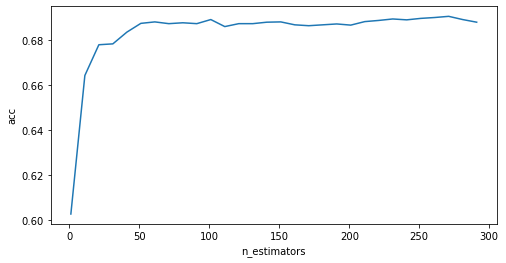

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,301,10),cross)
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.show()
#print('最优n_estimators',(cross.index(max(cross))*10)+1,max(cross))

In [235]:
cross = []
for i  in range(260,280,1):
    rf = RandomForestClassifier(n_estimators=i+1, n_jobs=-1,random_state=50)
    cross_score = cross_val_score(rf, data, target, cv=5).mean()
    cross.append(cross_score)

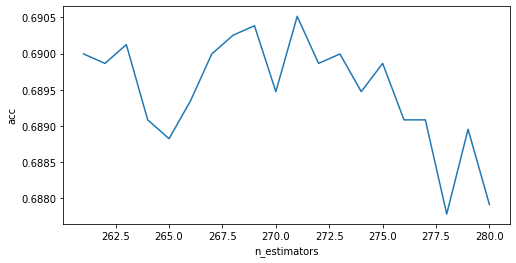

271 0.690515612718949


In [236]:
plt.figure(figsize=(8, 4))
plt.plot(range(261,281,1),cross)
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.show()
print((cross.index(max(cross))*1)+261,max(cross))
n_est=(cross.index(max(cross))*1)+261

In [18]:
param_grid = {'max_features' : np.arange(1,17,1)}
#一般根据数据大小进行尝试，像该数据集 可从1-10 或1-20开始
rf = RandomForestClassifier(n_estimators=n_est,random_state=50,n_jobs=-1)
GS = GridSearchCV(rf,param_grid,cv=5)
GS.fit(data,target)
max_f=GS.best_params_['max_features']
print(GS.best_params_)
print(GS.best_score_)

{'max_features': 12}
0.7009244022393445


In [223]:
param_grid = {'max_depth' : np.arange(1,30,1)}
#一般根据数据大小进行尝试，像该数据集 可从1-10 或1-20开始
rf = RandomForestClassifier(n_estimators=n_est,max_features=max_f,random_state=50,n_jobs=-1)
GS = GridSearchCV(rf,param_grid,cv=5)
GS.fit(data,target)
max_d=GS.best_params_['max_depth']
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 13}
0.7074272834875838


confusion matrix:
 preds      0    1
actual           
0       1025  253
1        419  610
accuracy= 0.7087126137841352
precision= 0.8020344287949922
recall= 0.7098337950138505
cross_val_score= 0.5960743785920422
obb= 0.7009293680297398


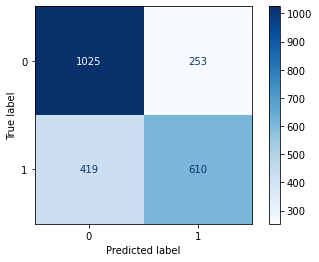

In [20]:
rnd = RandomForestClassifier(n_jobs=-1,n_estimators=n_est,max_features=max_f,max_depth=13,
                             random_state=50,oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state= 50)

rnd.fit(X_train,y_train)
y_pred=rnd.predict(X_test)
a=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])
acc=(a.iloc[0,0]+a.iloc[1,1])/(a.iloc[0,0]+a.iloc[0,1]+a.iloc[1,0]+a.iloc[1,1])
pre=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[0,1])
rec=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[1,0])
print('confusion matrix:\n',a)
print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)
print('cross_val_score=',cross_val_score(clf, data, target, cv=5).mean())
print('obb=',rnd.oob_score_)
a=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(a).plot(cmap=plt.cm.Blues)

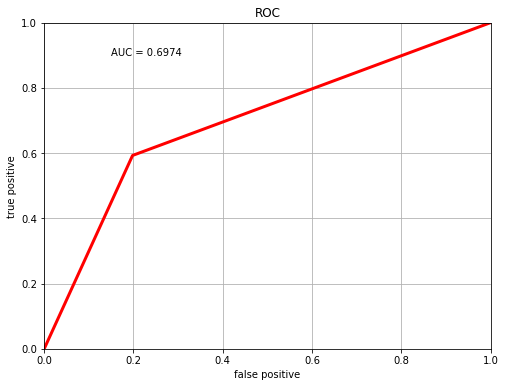

In [24]:
fpr_Nb, tpr_Nb, threshold = roc_curve(y_test, y_pred)
aucval = auc(fpr_Nb, tpr_Nb)    # 计算auc的取值
plt.figure(figsize=(8,6))
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel("false positive")
plt.ylabel("true positive")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("ROC")
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.show()


Text(0, 0.5, 'TPR')

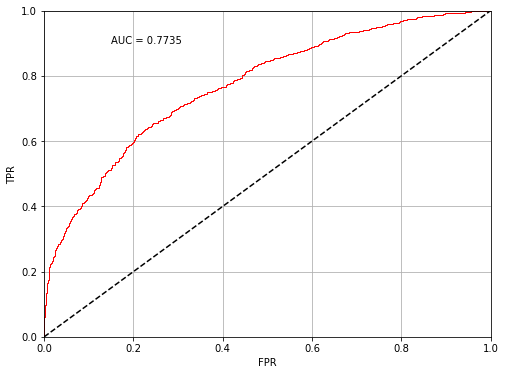

In [36]:
fpr,tpr, thresholds = roc_curve(y_test,rnd.predict_proba(X_test)[:,1])
aucval = auc(fpr, tpr) 
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,"r",linewidth = 1)
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.xlabel('FPR')
plt.ylabel('TPR')


In [37]:
importances = rnd.feature_importances_
indices = np.argsort(importances)[::-1] 
cols_name = features 
for f in range(17): 
    print("%2d) %-*s %f" % (f + 1,30,cols_name[f],importances[indices[f]])) 

 1) 性别                             0.146783
 2) 年龄                             0.138733
 3) 归属地                            0.089952
 4) 在网时长                           0.079088
 5) 换机频率                           0.076729
 6) 终端类型                           0.070941
 7) 最近使用操作系统偏好                     0.070757
 8) 上网流量使用                         0.059099
 9) 漫游流量使用                         0.057437
10) 总收入                            0.051996
11) 增值收入                           0.051297
12) 流量收入                           0.042586
13) 短信收入                           0.037483
14) 彩信收入                           0.010720
15) 语音收入                           0.008336
16) 是否欠费                           0.006476
17) 产品大类                           0.001588


# KNN

In [ ]:
#KNN
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier

confusion matrix:
 preds     0    1
actual          
0       764  514
1       554  475
accuracy= 0.5370611183355006
precision= 0.5978090766823161
recall= 0.5796661608497724


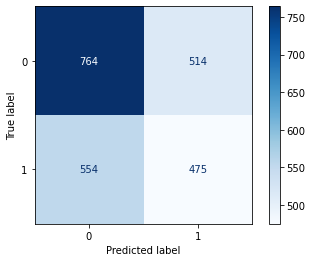

In [232]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=50)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
a=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])
acc=(a.iloc[0,0]+a.iloc[1,1])/(a.iloc[0,0]+a.iloc[0,1]+a.iloc[1,0]+a.iloc[1,1])
pre=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[0,1])
rec=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[1,0])
print('confusion matrix:\n',a)
print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)
a=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(a).plot(cmap=plt.cm.Blues)

In [226]:
s = StandardScaler()
s_data = s.fit_transform(data)
X_train, X_test, y_train, y_test = 
    train_test_split(s_data, target, test_size=0.3, random_state=100)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Standard accuracy= ',accuracy_score(y_test, y_pred))

mm = MinMaxScaler()
m_data = mm.fit_transform(data)
X_train, X_test, y_train, y_test = 
    train_test_split(m_data, target, test_size=0.3, random_state=100)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('MinMax accuracy= ',accuracy_score(y_test, y_pred))

original accuracy=  0.5370611183355006
Standard accuracy=  0.6168183788469874
MinMax accuracy=  0.6302557433896836


In [245]:
#选择MinMaxScaler
mm = MinMaxScaler()
m_data = mm.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(m_data, target, test_size=0.3, random_state=100)

best k =  18


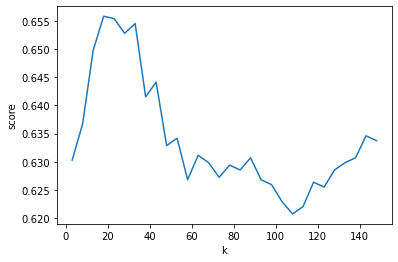

In [246]:
#利用学习曲线找 best k
ks = np.arange(3,150,5)
scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    scores.append(score)
scores = np.array(scores)
plt.plot(ks,scores)
plt.xlabel('k')
plt.ylabel('score')
max_value_index = scores.argmax()
best_k = ks[max_value_index]
print('best k = ',best_k)

In [247]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
a=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])
acc=(a.iloc[0,0]+a.iloc[1,1])/(a.iloc[0,0]+a.iloc[0,1]+a.iloc[1,0]+a.iloc[1,1])
pre=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[0,1])
rec=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[1,0])
print('confusion matrix:\n',a)
print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)

confusion matrix:
 preds     0    1
actual          
0       984  251
1       543  529
accuracy= 0.6558300823580407
precision= 0.7967611336032389
recall= 0.6444007858546169


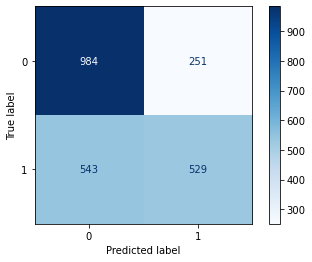

In [230]:
a=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(a).plot(cmap=plt.cm.Blues)

# 逻辑回归

confusion matrix:
 preds     0    1
actual          
0       852  383
1       472  600
accuracy= 0.6293888166449935
precision= 0.6898785425101215
recall= 0.6435045317220544


/Users/yanjue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


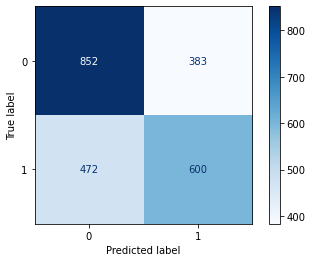

In [345]:
#逻辑回归
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=100)
from sklearn.preprocessing import PolynomialFeatures
s = StandardScaler()
s_data = s.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=100)

log = LogisticRegression(random_state=50)
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
#print('accuracy= ',accuracy_score(y_test, y_pred))
a=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])
acc=(a.iloc[0,0]+a.iloc[1,1])/(a.iloc[0,0]+a.iloc[0,1]+a.iloc[1,0]+a.iloc[1,1])
pre=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[0,1])
rec=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[1,0])
print('confusion matrix:\n',a)
print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)
a=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(a).plot(cmap=plt.cm.Blues)

confusion matrix:
 preds     0    1
actual          
0       856  379
1       474  598
accuracy= 0.6302557433896836
precision= 0.6931174089068826
recall= 0.643609022556391


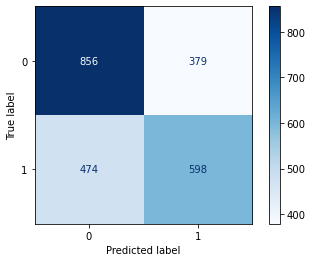

In [349]:
s = StandardScaler()
s_data = s.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(s_data, target, test_size=0.3, random_state=100)

log = LogisticRegression(random_state=50)
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
#print('accuracy= ',accuracy_score(y_test, y_pred))
a=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])
acc=(a.iloc[0,0]+a.iloc[1,1])/(a.iloc[0,0]+a.iloc[0,1]+a.iloc[1,0]+a.iloc[1,1])
pre=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[0,1])
rec=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[1,0])
print('confusion matrix:\n',a)
print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)
a=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(a).plot(cmap=plt.cm.Blues)

In [335]:
from sklearn.feature_selection import  RFECV
log = LogisticRegression(random_state=42,penalty='l2',C=1,max_iter=500)
rfe = RFECV(estimator=log,          # 学习器
              step=1,                 # 移除特征个数
          scoring='accuracy')
rfe = rfe.fit(X_train,y_train)
#print(rfe.support_)
#print(rfe.ranking_)
y_pred=rfe.predict(X_test)
print('accuracy= ',accuracy_score(y_test, y_pred))

accuracy=  0.6337234503684439


confusion matrix:
 preds     0    1
actual          
0       848  387
1       458  614
accuracy= 0.6337234503684439
precision= 0.6866396761133603
recall= 0.6493108728943339


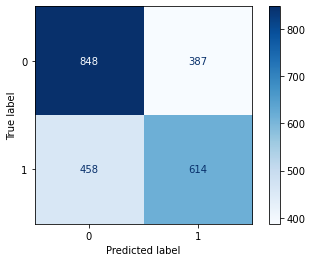

In [336]:
a=pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])
acc=(a.iloc[0,0]+a.iloc[1,1])/(a.iloc[0,0]+a.iloc[0,1]+a.iloc[1,0]+a.iloc[1,1])
pre=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[0,1])
rec=(a.iloc[0,0])/(a.iloc[0,0]+a.iloc[1,0])
print('confusion matrix:\n',a)
print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)
a=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(a).plot(cmap=plt.cm.Blues)

# 神经网络

In [380]:
from sklearn import neural_network

mlp=neural_network.MLPClassifier(hidden_layer_sizes=(10), #隐藏层
                                 #（10,20）指的是隐藏层层数+每层单元数
                                activation='relu',  #激活函数
                                solver='adam',
                                alpha=0.0001,  #正则化项系数
                                batch_size='auto',
                                learning_rate='constant',  #学习率
                                learning_rate_init=0.001,
                                power_t=0.5,
                                max_iter=10000,  #迭代次数
                                tol=1e-4)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)  #预测结果

In [379]:
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test,y_pred)
print(conf)
#精度
print((conf[0][0]+conf[1][1])/len(y_test))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1235
           1       0.65      0.56      0.60      1072

    accuracy                           0.65      2307
   macro avg       0.65      0.65      0.65      2307
weighted avg       0.65      0.65      0.65      2307

[[910 325]
 [471 601]]
0.6549631556133507


In [333]:
voting_clf = VotingClassifier(
        estimators=[('log', log), ('rf', rnd), ('knn', knn),('')],
        voting='soft'
    )
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log, rnd, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6298222800173385
RandomForestClassifier 0.6909406155179887
KNeighborsClassifier 0.6337234503684439
VotingClassifier 0.6636324230602514


In [121]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(probability=True, random_state=42)